In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

In [312]:
class OnlineLearning:
    def __init__(self, F, sigma):
        self.count = 0
        self.F = F
        self.n = 0
        self.V = 0
        self.v = np.zeros((F.shape[0], 1))
        self.T = np.zeros((F.shape[0], F.shape[0]))
        self.sigma = sigma
    
    def _calc_funcs(self, X):
        res = np.array([])
        for el in self.F:
            res = np.append(res, el(X))
        return res[:, np.newaxis]

    def _learn_one_element(self, X, y):
        results = self._calc_funcs(X)
        self.n += 1
        self.V += np.square(y)
        self.v += results.dot(y)
        self.T += results.dot(results.T)
        self.count += 1
        
    def _get_var(self, x):
        result = self._calc_funcs(x)
        return (np.square(self.sigma) * result.T).dot(np.linalg.inv(self.T)).dot(result)[0]
    
    def _get_var_hat(self, x):
        result = self._calc_funcs(x)
        numerator = self.V - self.v.T.dot(np.linalg.inv(self.T)).dot(self.v)
        denominator = self.count - result.size
        return numerator / denominator * result.T.dot(np.linalg.inv(self.T)).dot(result)
    
    def fit(self, X, y):
        x_to_plot = X
        y_to_plot = y
        for i in range(len(y)):
            self._learn_one_element(X[i], y[i])
            if i and i % 100 == 0 or i == len(y)-1:
                
                y_hat_to_plot = np.array([regr.predict(el) for el in x_to_plot[:i]])
                var_y_hat_to_plot = np.array([regr._get_var(el) for el in x_to_plot[:i]])

                var_hat_y_hat_to_plot = np.array([regr._get_var_hat(el) for el in x_to_plot[:i]])
                var_hat_y_hat_to_plot = np.squeeze(var_hat_y_hat_to_plot, axis=2)
                
                self._draw(x_to_plot[:i], y_to_plot[:i], y_hat_to_plot, 
                           var_y_hat_to_plot, var_hat_y_hat_to_plot, i)
                
        return self
    
    def _draw(self, x, y, y_hat, var_y, var_hat_y, iter_num):
        plt.plot(x, y, 'r.', label='Точки')
        sorted_vals = np.hstack((x[:, np.newaxis], 
                                 y[:, np.newaxis], 
                                 y_hat[:, np.newaxis], 
                                 var_y, var_hat_y))
        sorted_vals = np.array(sorted(sorted_vals, key=lambda x: x[0]))

        x, y, y_hat = sorted_vals[:, 0], sorted_vals[:, 1], sorted_vals[:, 2]
        var_y, var_hat_y = sorted_vals[:, 3], sorted_vals[:, 4]
        plt.plot(x, y_hat, 'b-', label='Предсказанные')

        plt.plot(x, y_hat + var_y, 'b--')
        plt.plot(x, y_hat - var_y, 'b--', label='Отклоенение Y')
        plt.plot(x, y_hat + var_hat_y, 'g--')
        plt.plot(x, y_hat - var_hat_y, 'g--', label='Оценка отклонения')
        plt.title(f'Аппроксимация функции при {iter_num} точках')
        #plt.ylim(-1000, 1000)
        plt.legend()
        plt.show()
        
    def predict(self, X_test):
        results = self._calc_funcs(X_test)
        return results.T.dot(np.linalg.inv(self.T)).dot(self.v)[0, 0]

In [343]:
sigma = 250
x = np.linspace(-15, 15, 1000)
np.random.shuffle(x)
y = 1 + x + x ** 2 + x ** 3 + np.random.randn(x.shape[0]) * sigma

In [344]:
f1 = lambda x: 1
f2 = lambda x: x
f3 = lambda x: x**2
f4 = lambda x: x**3
F = np.array([f1, f2, f3, f4])
regr = OnlineLearning(F, sigma)

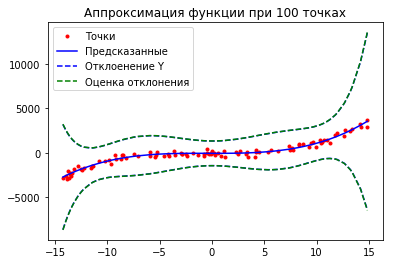

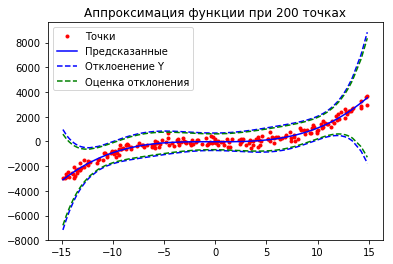

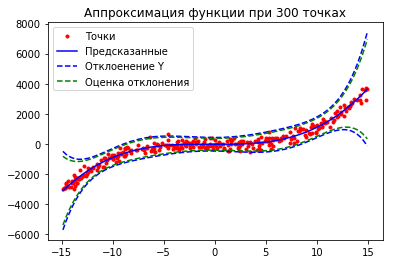

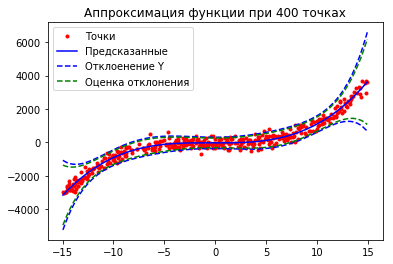

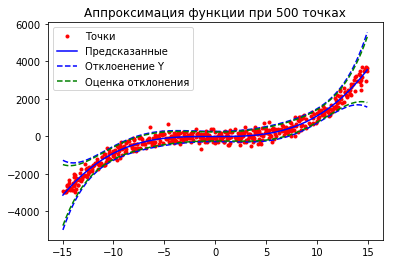

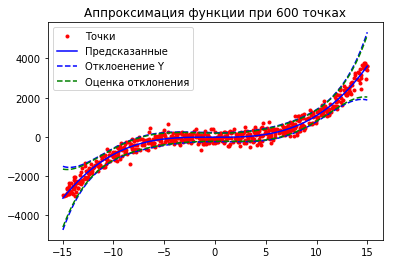

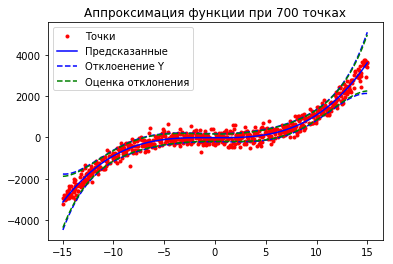

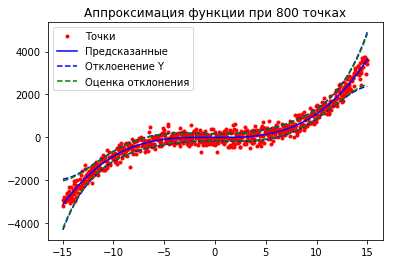

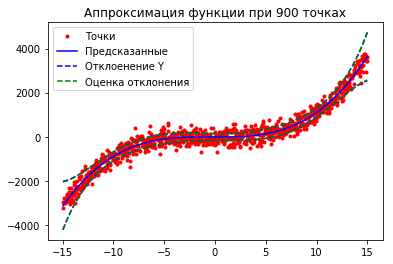

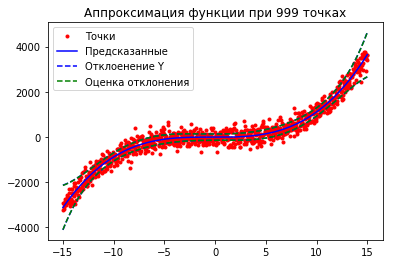

In [345]:
regr.fit(x, y)